In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../antifraud/data/CIS"))

['sample_submission.csv', 'test_identity.csv', 'test_transaction.csv', 'train_identity.csv', 'train_transaction.csv']


In [ ]:
from sklearn import preprocessing
import xgboost as xgb

In [ ]:
train_transaction = pd.read_csv('../antifraud/data/CIS/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('../antifraud/data/CIS/test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('../antifraud/data/CIS/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('../antifraud/data/CIS/test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('../antifraud/data/CIS/sample_submission.csv', index_col='TransactionID')

In [ ]:
# Load the train data
train_id = train_identity

In [ ]:
print(train_transaction)
print(train_id)

               isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400           68.50         W  13926    NaN   
2987001              0          86401           29.00         W   2755  404.0   
2987002              0          86469           59.00         W   4663  490.0   
2987003              0          86499           50.00         W  18132  567.0   
2987004              0          86506           50.00         H   4497  514.0   
...                ...            ...             ...       ...    ...    ...   
3577535              0       15811047           49.00         W   6550    NaN   
3577536              0       15811049           39.50         W  10444  225.0   
3577537              0       15811079           30.95         W  12037  595.0   
3577538              0       15811088          117.00         W   7826  481.0   
3577539              0      

In [ ]:
# Print %age of null values
total_rows = train_id.shape[0]
columns_to_drop = []
for cols in train_id.columns:
  # check null values
  null_count = train_id[cols].isnull().sum()
  if null_count > 0:
    perc_null_values = float(null_count)*100/total_rows

    if perc_null_values > 50:
      columns_to_drop.append(cols)

In [ ]:
columns_to_drop

# drop the columns to drop
train_id.drop(columns_to_drop, axis=1, inplace=True)

# fill  the rest of nan with default values
train_id.fillna(-999, inplace=True)

In [ ]:

from sklearn.preprocessing import LabelEncoder
# label encode the categorical columns
cat_cols = [cols for cols in train_id.columns if train_id[cols].dtype == 'object']

# Label Encoder object
le = LabelEncoder()
for col in cat_cols:
  train_id[col] = train_id[col].astype('str')
  train_id[col] = le.fit_transform(train_id[col])


print(train_id.shape)

C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


(144233, 28)


In [ ]:
# print percentage of null values in the transaction data
# Print %age of null values
total_rows = train_transaction.shape[0]
columns_to_drop = []
for cols in train_transaction.columns:
  # check null values
  null_count = train_transaction[cols].isnull().sum()
  if null_count > 0:
    perc_null_values = float(null_count)*100/total_rows

    if perc_null_values > 50:
      columns_to_drop.append(cols)

In [ ]:
len(columns_to_drop)

# drop the columns to drop
train_transaction.drop(columns_to_drop, axis=1, inplace=True)

# Substitute default values in the rest of the null values
train_transaction.fillna(-999, inplace=True)


# Encode the categorical cols
cat_cols2 = [cols for cols in train_transaction.columns if train_transaction[cols].dtype == 'object']
for cols in cat_cols2:
  le = LabelEncoder()
  train_transaction[cols] = train_transaction[cols].astype('str')
  train_transaction[cols] = le.fit_transform(train_transaction[cols])

C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


In [ ]:
train_transaction.head()


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,4,13926,-999.0,150.0,2,142.0,2,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
2987001,0,86401,29.0,4,2755,404.0,150.0,3,102.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987002,0,86469,59.0,4,4663,490.0,150.0,4,166.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987003,0,86499,50.0,4,18132,567.0,150.0,3,117.0,3,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
2987004,0,86506,50.0,1,4497,514.0,150.0,3,102.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

train_id.head()

,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,-999.0,-999.0,-999.0,-999.0,100.0,1,-999.0,-480.0,...,124,32.0,165,4,2,1,2,2,2,955
2987008,-5.0,98945.0,0.0,-5.0,-999.0,-999.0,100.0,1,49.0,-300.0,...,99,32.0,49,3,2,1,1,2,2,1728
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,1,52.0,-999.0,...,45,-999.0,0,0,1,1,2,2,1,1599
2987011,-5.0,221832.0,0.0,-6.0,-999.0,-999.0,100.0,1,52.0,-999.0,...,45,-999.0,0,0,1,1,2,2,1,0
2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,1,-999.0,-300.0,...,45,24.0,41,4,2,1,2,2,1,724


In [ ]:
# merge both the dataset
final_data = pd.merge(left = train_id, right = train_transaction, on='TransactionID', how='inner')
final_data.head()

,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,-999.0,-999.0,-999.0,-999.0,100.0,1,-999.0,-480.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2987008,-5.0,98945.0,0.0,-5.0,-999.0,-999.0,100.0,1,49.0,-300.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,100.0,1,52.0,-999.0,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
2987011,-5.0,221832.0,0.0,-6.0,-999.0,-999.0,100.0,1,52.0,-999.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2987016,0.0,7460.0,1.0,0.0,0.0,0.0,100.0,1,-999.0,-300.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# split the dataset into train features and target varaible
X = final_data.drop('isFraud', axis=1)
y = final_data['isFraud']


# split the tdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)



C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Print the accuracy score
print(xgb_clf.score(X_test, y_test))

0.9735847748466046


C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or 

C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\jigya\anaconda3\envs\COMP594\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or 

0.9744140625650103
0.8128683693516698


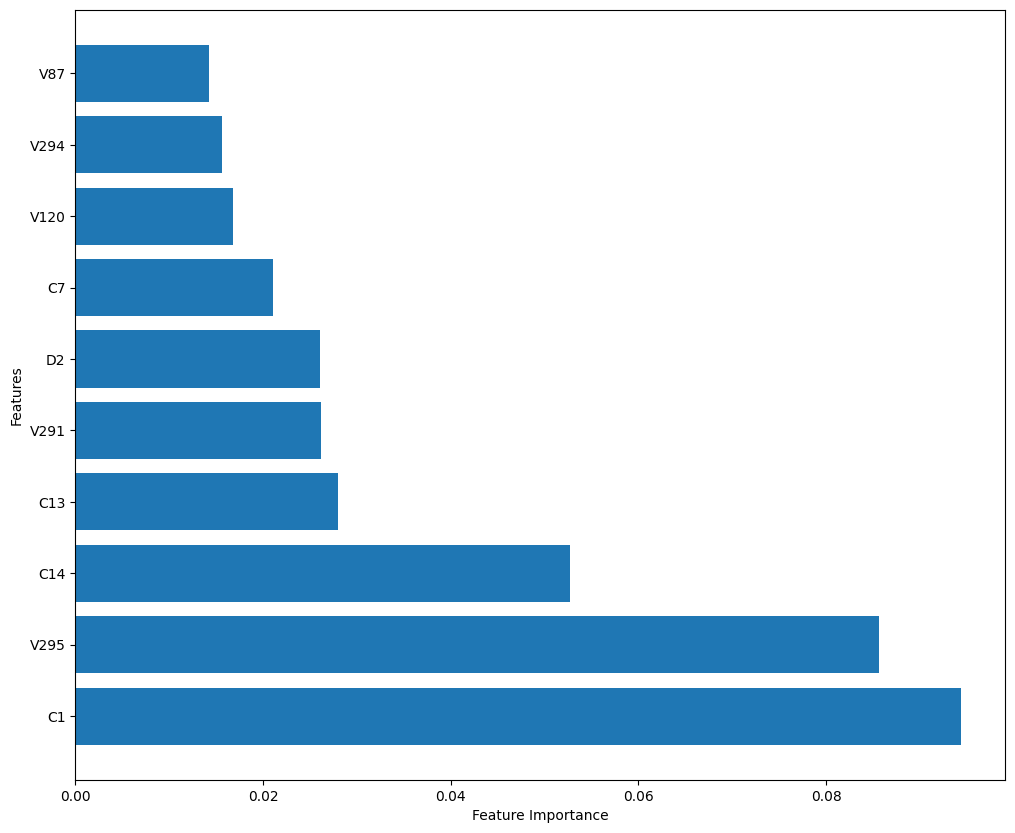

In [ ]:

import matplotlib.pyplot as plt

# Compute ROC AUC Score
prediction_probability = xgb_clf.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probability[ : , 1]))

# Compute ROC AUC Score
prediction = xgb_clf.predict(X_test)
print(f1_score(y_test, prediction))

# print the feature importance
features = X.columns
feature_imp = xgb_clf.feature_importances_

feat_imp_df = pd.DataFrame({'Features' : features, 'Feature_Importance' : feature_imp}).sort_values(by='Feature_Importance', ascending=False)

# Plot the feature_importance : only top 10
plt.figure(figsize=(12,10))
plt.barh(y=feat_imp_df['Features'].iloc[ : 10], width=feat_imp_df['Feature_Importance'].iloc[ : 10])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [ ]:
!pip install tenseal

DEPRECATION: Loading egg at c:\users\jigya\anaconda3\envs\comp594\lib\site-packages\blinker-1.6.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\jigya\anaconda3\envs\comp594\lib\site-packages\cryptography-41.0.4-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\jigya\anaconda3\envs\comp594\lib\site-packages\flask-3.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\jigya\anaconda3\envs\comp594\lib\site-packages\iniconfig-2.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\jigya\anaconda3